# Rodrigo_Mesquita_DR3_AT
## Desenvolvimento Front-End com Python (com Streamlit) [24E3_1]

> ### Repositório Github: https://github.com/rodrigo1992-cmyk/DR1_AT
> ### Aplictivo publicado: https://k6o3emqbdafzwi827nmkse.streamlit.app/

## 1. Preparar o ambiente de desenvolvimento:
* Crie um ambiente virtual para seu projeto utilizando uma ferramenta como venv, virtualenv ou pipenv.
* Instale as bibliotecas necessárias (Streamlit, statsbombpy, mplsoccer, matplotlib, entre outras).

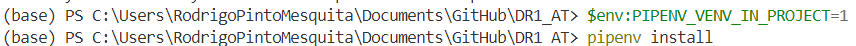

## 2. Estruturar o projeto:
* Crie um repositório no GitHub para hospedar o código do seu projeto.
* Garanta que o repositório contenha um arquivo requirements.txt com as dependências necessárias para rodar o projeto.
* Organize o código de forma clara, criando funções separadas para carregar os dados, gerar as visualizações e construir a interface do dashboard.

> ### Repositório Github: https://github.com/rodrigo1992-cmyk/DR1_AT

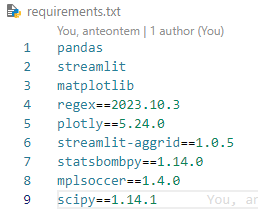

## 3. Definir a estrutura do dashboard:
* Desenvolva uma interface interativa em Streamlit que permita ao usuário selecionar:
  * Um campeonato específico.
  * Uma temporada (ano).
  * Uma partida ou jogador para análise.
* Organize o layout do dashboard em colunas, usando columns, sidebars, containers e tabs para melhorar a usabilidade.

In [33]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_partida, df_partidas_filtrado, df_eventos = 'Selecione', pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                df_eventos = sb.events(match_id=df_partidas_filtrado['match_id'].values[0])

    return filtro_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_eventos):
    st.write('Dados da Partida')
    st.dataframe(df_partidas_filtrado)
    st.write('Eventos na Partida')
    st.dataframe(df_eventos)


######################################  INICIA O APLICATIVO ######################################
filtro_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])
    with tab_tabelas:
        tabelas_pg_partida(df_eventos)
    


Overwriting app.py


## 4. Obter dados e exibir informações básicas
* Use a biblioteca StatsBombPy para carregar dados de competições, temporadas, partidas e jogadores.
* Mostre, em uma página do dashboard, as seguintes informações:
* Nome da competição, temporada e partida selecionada.
* Estatísticas básicas da partida (gols, chutes, passes, etc.).
* Um DataFrame exibindo os eventos da partida, como passes, finalizações e desarmes.

In [96]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos = 'Selecione','Selecione','Selecione', pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                df_eventos = sb.events(match_id=df_partidas_filtrado['match_id'].values[0])
            
    return filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)
    
def resumo_selecao(df_partidas_filtrado, df_eventos):
    #Exibe um resumo dos filtros selecionados
    
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = filtro_camp
        
        if filtro_ano != 'Selecione':
            texto_selecao = filtro_camp + " > " + filtro_ano
            if filtro_partida != 'Selecione':
                texto_selecao = filtro_camp + " > " + filtro_ano + " > " + filtro_partida

    st.write(f'#### {texto_selecao}')

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado['resultado'].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

    #Exibe um resumo dos dados da partida


######################################  INICIA O APLICATIVO ######################################
filtro_camp, filtro_ano, filtro_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
resumo_selecao(df_partidas_filtrado, df_eventos)

if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])
        
    with tab_tabelas:
        tabelas_pg_partida(df_partidas_filtrado,df_eventos)
    


Overwriting app.py


## 5. Criar visualizações de dados
* Utilize a biblioteca mplsoccer para gerar um mapa de passes e mapa de chutes para uma partida específica. Garanta que o gráfico seja  interativo, com legendas e informações que ajudem a interpretar os dados.
* Crie visualizações adicionais com Matplotlib e Seaborn para explorar relações entre as estatísticas de uma partida ou de um jogador (por exemplo, relação entre número de passes e gols).
* Utilize a biblioteca mplsoccer para novas visualizações de acordo com sua galeria (https://mplsoccer.readthedocs.io/en/latest/gallery/index.html)

In [288]:
%%writefile app.py

import pandas as pd
import streamlit as st
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

st.set_page_config(layout="wide")

def filtros_barra_lateral():
    st.sidebar.header('Filtros')

    df_camp = sb.competitions()

    filtro_camp, filtro_ano, filtro_partida, filtro_id_partida = 'Selecione','Selecione','Selecione', 0
    df_partidas_filtrado, df_eventos = pd.DataFrame(), pd.DataFrame()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp)

    #Aplico a condição para só filtrar se houver seleção
    if filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if filtro_partida != 'Selecione':
                df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                filtro_id_partida = df_partidas_filtrado['match_id'].values[0]
                df_eventos = sb.events(match_id=filtro_id_partida)
            
    return filtro_camp, filtro_ano, filtro_partida, filtro_id_partida, df_partidas_filtrado, df_eventos

def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)
    
def resumo_selecao(df_partidas_filtrado, df_eventos):
    #Exibe um resumo dos filtros selecionados
    
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = filtro_camp
        
        if filtro_ano != 'Selecione':
            texto_selecao = filtro_camp + " > " + filtro_ano
            if filtro_partida != 'Selecione':
                texto_selecao = filtro_camp + " > " + filtro_ano + " > " + filtro_partida

    st.write(f'#### {texto_selecao}')

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado["resultado"].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

######################################  CRIA OS GRÁFICOS SOBRE OS TIMES ######################################
def graficos_partida(df_partidas_filtrado, df_eventos, time):
    st.markdown(f"<h3 style='text-align: center;'>{time}</h3>", unsafe_allow_html=True)

    df_gols = df_eventos.loc[(df_eventos.type == 'Shot') & (df_eventos.team == time)]
    df_gols = df_gols.groupby(['player', 'team','shot_outcome'])['type'].count().reset_index()
    df_gols.rename(columns={'type': 'gols'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_gols['player'] = df_gols['player'].str.split(' ').str[0]

    #-------------------------#Criar gráfico de gols usando seaborn#-------------------------#
    with st.container(height=450):

        if df_gols.empty:
            st.markdown(f"<h4 style='text-align: center; color: orange;'>Sem Gols Marcados</h3>", unsafe_allow_html=True)
        else:
            st.markdown(f"<h4 style='text-align: center;'>Chutes a Gol por Jogador</h3>", unsafe_allow_html=True)
            fig, ax = plt.subplots(figsize=(10, 4))
            sns.barplot(x='player', y='gols', hue='shot_outcome', data=df_gols, palette='viridis', ax=ax)

            # Adicionar rótulos de dados
            for i in ax.patches:
                ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), 
                        fontsize=10, color='black', ha='center')


            # Ajustar a cor da legenda para preto
            ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(-0, +1.6), fontsize='large', title='Resultado do Chute', edgecolor='black')
            for text in ax.get_legend().get_texts(): text.set_color('black')

            #ajustar tamanho do eixo y para 120% do maior valor
            ax.set_ylim(0, df_gols.gols.max() * 1.2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig, use_container_width=True)

    #-------------------------#Criar gráfico de passes usando Seaborn#-------------------------#
    with st.container(height=700):
        st.markdown(f"<h4 style='text-align: center;'>Passes por Jogador</h3>", unsafe_allow_html=True)
        df_passes = df_eventos.loc[(df_eventos.type == 'Pass') & (df_eventos.team == time)]
        df_passes = df_passes.groupby(['player', 'team'])['type'].count().reset_index().sort_values(by='type', ascending=False)
        df_passes.rename(columns={'type': 'passes'}, inplace=True)
        #Ajusto a coluna para pegar apenas o primeiro nome do jogador
        df_passes['player'] = df_passes['player'].str.split(' ').str[0]

        fig, ax = plt.subplots(figsize=(6, 8))
        sns.barplot(x='passes', y='player', data=df_passes, palette='viridis', ax=ax)
        for i in ax.patches:
            ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(int(i.get_width())), fontsize=10, color='black')
        st.pyplot(fig)

######################################  PLOTA O MAPA DE PASSES E GOLS ######################################

def pass_plot(df_eventos, filtro_id_partida):
    with st.container(height=920):
        st.markdown(f"<h4 style='text-align: center;'>Mapa de Rota dos Chutes e Passes</h4>", unsafe_allow_html=True)

        rcParams['text.color'] = '#c7d5cc'
        
        parser = Sbopen()
        df, related, freeze, tactics = parser.event(df_eventos['match_id'].values[0])

        #Criando um Seletor para escolher Time e um para escolher o tipo de evento
        team1, team2 = df.team_name.unique()
        
        col1, col2 = st.columns(2)
        with col1:
            tipo_label = st.radio("Selecione a visualização", ('Chutes a Gol', 'Passes'))
            if tipo_label == 'Chutes a Gol': tipo = 'Shot'
            else: tipo = 'Pass'
        with col2:
            team = st.radio("Selecione um time", (team1, team2))

        mask_team = (df.type_name == tipo) & (df.team_name == team)

        #Filter dataset to only include one teams passes and get boolean mask for the completed passes
        df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
        mask_complete = (df_pass.outcome_name == 'Goal') | (df_pass.outcome_name.isnull())

        #Criando o gráfico
        pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
        fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
        fig.set_facecolor('#22312b')

        # Plotar os chutes/passes SEM Sucesso
        pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                    df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
                    headwidth=6, headlength=5, headaxislength=12,
                    color='#4E514C', ax=ax, label='Sem Sucesso')

        # Plotar os chutes/passes COM Sucesso
        pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
                    df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
                    headwidth=10, headlength=10, color='#55EA0B', ax=ax, label='Com Sucesso')

        # Set up the legend
        ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

        # Set the title
        ax_title = ax.set_title(f'{tipo_label}: {team}', fontsize=20)

        st.pyplot(fig)
        
######################################  PLOTA O MAPA DE PRESSAO ######################################
    with st.container(height=820):

        st.markdown(f"<h4 style='text-align: center;'>HeatMap de Análise da Pressão Sofrida</h4>", unsafe_allow_html=True)
        team_heatmap = st.radio("Selecione o time sob pressão", (team1, team2))

        # get data
        parser = Sbopen()
        df = pd.DataFrame(parser.event(df_eventos['match_id'].values[0])[0])  # 0 index is the event file

        mask_pressure = (df.team_name == team_heatmap) & (df.type_name == 'Pressure')
        df_pressure = df.loc[mask_pressure, ['x', 'y']]

        pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

        # draw
        fig, ax = pitch.draw(figsize=(6.6, 4.125))
        fig.set_facecolor('#22312b')
        bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
        # Add the colorbar and format off-white
        cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
        cbar.outline.set_edgecolor('#efefef')
        cbar.ax.yaxis.set_tick_params(color='#efefef')
        ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

        st.pyplot(fig)


######################################  INICIA O APLICATIVO ######################################
filtro_camp, filtro_ano, filtro_partida, filtro_id_partida, df_partidas_filtrado, df_eventos = filtros_barra_lateral()
resumo_selecao(df_partidas_filtrado, df_eventos)

if filtro_partida != 'Selecione':
    tab_graf, tab_tabelas = st.tabs(['Gráficos', 'Tabelas'])

    with tab_graf:
        col_a, col_b = st.columns(2)
        with col_a:
            graficos_partida(df_partidas_filtrado, df_eventos, df_partidas_filtrado.home_team.values[0])
        with col_b:
            graficos_partida(df_partidas_filtrado, df_eventos, df_partidas_filtrado.away_team.values[0])
            
        pass_plot(df_eventos,filtro_id_partida)
        
    with tab_tabelas:
        tabelas_pg_partida(df_partidas_filtrado,df_eventos)
    


Overwriting app.py


## 6. Adicionar interatividade
* Adicione seletores de jogadores e botões de filtro que permitam ao usuário visualizar apenas eventos relacionados a um jogador específico.
* Inclua botões de download que permitam ao usuário baixar os dados filtrados da partida em formato CSV.
* Utilize barras de progresso e spinners para informar ao usuário que os dados estão sendo carregados ou processados.

> Criei a página "Análise Jogadores", que permite selecionar dois jogadores e gerar o dataframe de cada um.
> 
> Adicionei os botões de downloads na página "Análise Jogadores"
> 
> Adicionei a Barra de Progresso no topo da página, para aparecer sempre que trocar um filtro
> 
> Adicionei os Spinners nos mapas pois demoram a carregar
>
> Já adiantei a adição do st.cache_data solicitado na questão 9, o utilizando para armazenar os dados dos gráficos da página "Análise Partida"
>
> Também adiantei a adição do st.session_state solicitado na questão 9, o utilizando armazenar os resultados dos filtros da aba lateral.


## O Mapa dos arquivos e Página ficou assim:
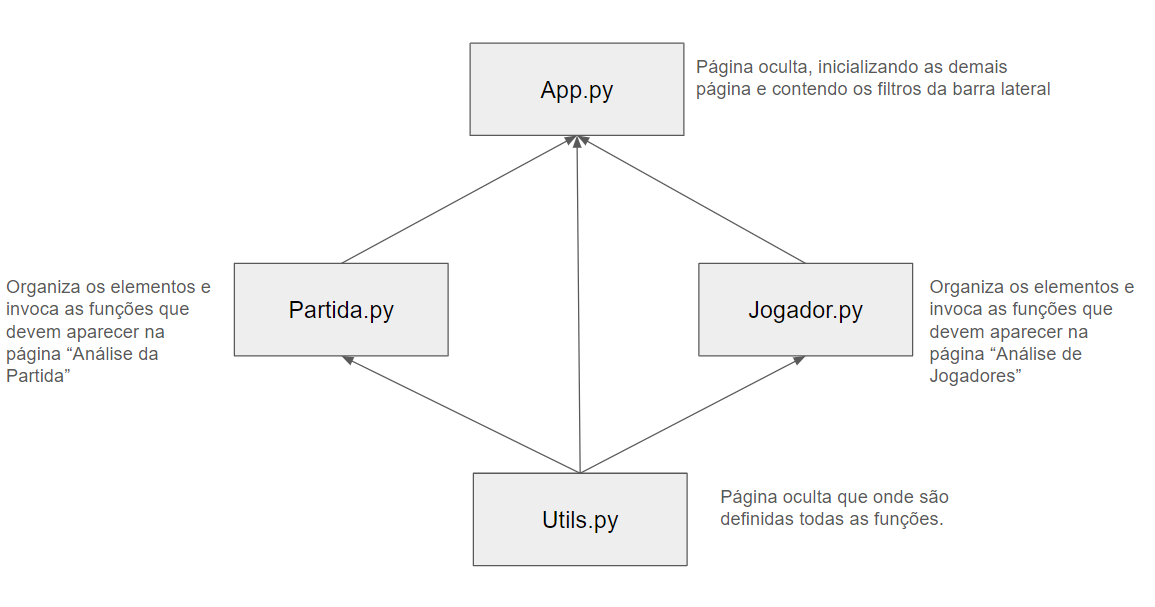

In [1]:
%%writefile utils.py

import pandas as pd
import streamlit as st
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import time

def filtros_barra_lateral():

    #Inicializo as variáveis de sessão
    if 'filtro_camp' not in st.session_state:
        st.session_state.filtro_camp = 'Selecione'

    if 'filtro_ano' not in st.session_state:
        st.session_state.filtro_ano = 'Selecione'

    if 'filtro_partida' not in st.session_state:
        st.session_state.filtro_partida = 'Selecione'

    if 'filtro_id_partida' not in st.session_state:
        st.session_state.filtro_id_partida = 'Selecione'

    if 'df_partidas_filtrado' not in st.session_state:
        st.session_state.df_partidas_filtrado = pd.DataFrame()

    if 'df_eventos' not in st.session_state:
        st.session_state.df_eventos = pd.DataFrame()

    df_camp = sb.competitions()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    st.session_state.filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp, key='1')

    #Aplico a condição para só filtrar se houver seleção
    if st.session_state.filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == st.session_state.filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        st.session_state.filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if st.session_state.filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == st.session_state.filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            st.session_state.filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if st.session_state.filtro_partida != 'Selecione':
                st.session_state.df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == st.session_state.filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                filtro_id_partida = st.session_state.df_partidas_filtrado['match_id'].values[0]
                st.session_state.df_eventos = sb.events(match_id=filtro_id_partida)

    #Exibe um resumo dos filtros selecionados
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if st.session_state.filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = st.session_state.filtro_camp
        
        if st.session_state.filtro_ano != 'Selecione':
            texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano
            if st.session_state.filtro_partida != 'Selecione':
                texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano + " > " + st.session_state.filtro_partida

    st.write(f'#### {texto_selecao}')

@st.cache_data
def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)

def loading_bar(filtro_partida):
    #Adiciona uma Barra de Progresso
    if filtro_partida != 'Selecione':
        my_bar = st.progress(0, text="Carregando os dados selecionados...")
        for percent_complete in range(100):
            time.sleep(0.01)
            my_bar.progress(percent_complete + 1, text="Carregando os dados selecionados...")
        time.sleep(0.5)
        my_bar.empty()

@st.cache_data
def resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida):

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado["resultado"].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

######################################  CRIA OS GRÁFICOS SOBRE OS TIMES ######################################
@st.cache_data
def graficos_partida(df_partidas_filtrado, df_eventos, time):
    st.markdown(f"<h3 style='text-align: center;'>{time}</h3>", unsafe_allow_html=True)

    df_gols = df_eventos.loc[(df_eventos.type == 'Shot') & (df_eventos.team == time)]
    df_gols = df_gols.groupby(['player', 'team','shot_outcome'])['type'].count().reset_index()
    df_gols.rename(columns={'type': 'gols'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_gols['player'] = df_gols['player'].str.split(' ').str[0]

    #-------------------------#Criar gráfico de gols usando seaborn#-------------------------#
    with st.container(height=450):

        if df_gols.empty:
            st.markdown(f"<h4 style='text-align: center; color: orange;'>Sem Gols Marcados</h3>", unsafe_allow_html=True)
        else:
            st.markdown(f"<h4 style='text-align: center;'>Chutes a Gol por Jogador</h3>", unsafe_allow_html=True)
            fig, ax = plt.subplots(figsize=(10, 4))
            sns.barplot(x='player', y='gols', hue='shot_outcome', data=df_gols, palette='viridis', ax=ax)

            # Adicionar rótulos de dados
            for i in ax.patches:
                ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), 
                        fontsize=10, color='black', ha='center')


            # Ajustar a cor da legenda para preto
            ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(-0, +1.6), fontsize='large', title='Resultado do Chute', edgecolor='black')
            for text in ax.get_legend().get_texts(): text.set_color('black')

            #ajustar tamanho do eixo y para 120% do maior valor
            ax.set_ylim(0, df_gols.gols.max() * 1.2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig, use_container_width=True)

    #-------------------------#Criar gráfico de passes usando Seaborn#-------------------------#
    st.markdown(f"<h4 style='text-align: center;'>Passes por Jogador</h3>", unsafe_allow_html=True)
    df_passes = df_eventos.loc[(df_eventos.type == 'Pass') & (df_eventos.team == time)]
    df_passes = df_passes.groupby(['player', 'team'])['type'].count().reset_index().sort_values(by='type', ascending=False)
    df_passes.rename(columns={'type': 'passes'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_passes['player'] = df_passes['player'].str.split(' ').str[0]

    with st.container(height=700):
        fig, ax = plt.subplots(figsize=(6, 8))
        sns.barplot(x='passes', y='player', data=df_passes, palette='viridis', ax=ax)
        for i in ax.patches:
            ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(int(i.get_width())), fontsize=10, color='black')
        st.pyplot(fig)

######################################  PLOTA O MAPA DE PASSES E GOLS ######################################
def filtro_pass_plot(team1, team2):
    st.markdown(f"<h4 style='text-align: center;'>Mapa de Rota dos Chutes e Passes</h4>", unsafe_allow_html=True)
    col1, col2 = st.columns(2)
    with col1:
        tipo_label = st.radio("Selecione a visualização", ('Chutes a Gol', 'Passes'))
        if tipo_label == 'Chutes a Gol': tipo = 'Shot'
        else: tipo = 'Pass'
    with col2:
        team = st.radio("Selecione um time", (team1, team2))

    return tipo_label, tipo, team

@st.cache_data
def data_pass_plot(df_eventos, tipo, team):
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(df_eventos['match_id'].values[0])
    mask_team = (df.type_name == tipo) & (df.team_name == team)
    df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
    mask_complete = (df_pass.outcome_name == 'Goal') | (df_pass.outcome_name.isnull())

    return df_pass, mask_complete

@st.cache_data
def graf_pass_plot(df_pass, mask_complete, tipo_label, team):
    rcParams['text.color'] = '#c7d5cc'      
    
    with st.spinner('Processando o Mapa...'):
        time.sleep(3)
        
        #Criando o gráfico
        pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
        fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
        fig.set_facecolor('#22312b')

        # Plotar os chutes/passes SEM Sucesso
        pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                    df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
                    headwidth=6, headlength=5, headaxislength=12,
                    color='#4E514C', ax=ax, label='Sem Sucesso')

        # Plotar os chutes/passes COM Sucesso
        pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
                    df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
                    headwidth=10, headlength=10, color='#55EA0B', ax=ax, label='Com Sucesso')

        # Configurar legenda e título
        ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
        ax_title = ax.set_title(f'{tipo_label}: {team}', fontsize=20)

        st.pyplot(fig)
        
######################################  PLOTA O MAPA DE PRESSAO ######################################
def filtro_heat_plot(df_eventos,team1,team2):

    st.markdown(f"<h4 style='text-align: center;'>HeatMap de Análise da Pressão Sofrida</h4>", unsafe_allow_html=True)
    team_heatmap = st.radio("Selecione o time sob pressão", (team1, team2))
    return team_heatmap


@st.cache_data
def dados_heat_plot(df_eventos, team_heatmap):

    with st.spinner('Processando o Mapa...'):
        time.sleep(3)

        parser = Sbopen()
        df = pd.DataFrame(parser.event(df_eventos['match_id'].values[0])[0])  # 0 index is the event file      

        mask_pressure = (df.team_name == team_heatmap) & (df.type_name == 'Pressure')
        df_pressure = df.loc[mask_pressure, ['x', 'y']]

        return df_pressure

@st.cache_data
def graf_heat_plot(df_pressure, team_heatmap):
        # Criando o gráfico
        pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

        fig, ax = pitch.draw(figsize=(6.6, 4.125))
        fig.set_facecolor('#22312b')
        bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
        
        cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
        cbar.outline.set_edgecolor('#efefef')
        cbar.ax.yaxis.set_tick_params(color='#efefef')
        ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

        st.pyplot(fig)

###################################### COMPARAÇÃO ENTRE JOGADORES ################################
def aba_jogadores(df_eventos):

    # Selecionar jogadores
    jogadores = df_eventos['player'].unique()

    col_a, col_b = st.columns(2)
    with col_a:
        jogadorA = st.selectbox("Selecione o Jogador A", jogadores)
    with col_b:
        jogadorB = st.selectbox("Selecione o Jogador B", jogadores)

    # Filtrar eventos por jogadores
    eventos_jogadorA = df_eventos[df_eventos['player'] == jogadorA]
    eventos_jogadorB = df_eventos[df_eventos['player'] == jogadorB]


    if not eventos_jogadorA.empty and not eventos_jogadorB.empty:
        col_1, col_2 = st.columns(2)
        with col_1:
            st.dataframe(eventos_jogadorA)
            csv = eventos_jogadorA.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorA}.csv', mime='text/csv',key='jogadorA')

        with col_2:
            st.dataframe(eventos_jogadorB)
            csv = eventos_jogadorB.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorB}.csv', mime='text/csv',key='jogadorB')

Overwriting utils.py


In [371]:
%%writefile App.py
import streamlit as st
from utils import *

st.set_page_config(layout="wide")

st.sidebar.header('Navegação')
page = st.sidebar.selectbox("",["Análise de Partidas", "Análise de Jogadores"])

st.sidebar.header('Filtros')
filtros_barra_lateral()

if page == "Análise de Partidas":
    import Partidas
    Partidas.exibir()
elif page == "Análise de Jogadores":
    import Jogadores
    Jogadores.exibir()

Overwriting App.py


In [2]:
%%writefile Partidas.py

import pandas as pd
import streamlit as st
from utils import *

######################################  INICIA O APLICATIVO ######################################

#Carrego as variáveis de sessão em variáveis locais para facilitar na hora de passar como parâmetro das funções
def exibir():

    df_partidas_filtrado = st.session_state.df_partidas_filtrado
    df_eventos = st.session_state.df_eventos
    filtro_camp = st.session_state.filtro_camp
    filtro_ano = st.session_state.filtro_ano
    filtro_partida = st.session_state.filtro_partida

    if df_partidas_filtrado.empty:
        pass
    else:
        home_team = df_partidas_filtrado.home_team.values[0]
        away_team  = df_partidas_filtrado.away_team.values[0]


    loading_bar(filtro_partida)
    resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida)
    
    if filtro_partida != 'Selecione':
        tab_graf, tab_tabelas = st.tabs(['GRÁFICOS', 'TABELAS'])

        with tab_graf:
            col_a, col_b = st.columns(2)
            with col_a:
                graficos_partida(df_partidas_filtrado, df_eventos, home_team)
            with col_b:
                graficos_partida(df_partidas_filtrado, df_eventos, away_team)

            with st.container(height=920):
                tipo_label, tipo, team = filtro_pass_plot(home_team,away_team)
                df_pass, mak_complete = data_pass_plot(df_eventos,tipo,team)
                graf_pass_plot(df_pass, mak_complete, tipo_label, team)

            with st.container(height=820):
                team_heatmap = filtro_heat_plot(df_eventos,home_team,away_team)
                df_pressure = dados_heat_plot(df_eventos,team_heatmap)
                graf_heat_plot(df_pressure,team_heatmap)

        with tab_tabelas:
            tabelas_pg_partida(df_partidas_filtrado,df_eventos)
            

Overwriting Partidas.py


In [381]:
%%writefile Jogadores.py

import pandas as pd
import streamlit as st
from utils import *


######################################  INICIA O APLICATIVO ######################################
def exibir():
    filtro_partida = st.session_state.filtro_partida
    
    loading_bar(filtro_partida)
    if st.session_state.filtro_partida != 'Selecione':
        aba_jogadores(st.session_state.df_eventos)

Overwriting Jogadores.py


## 7. Incluir métricas e indicadores
* Exiba indicadores numéricos usando a função metric() do Streamlit para mostrar, por exemplo:
* Total de gols da partida.
* Quantidade de passes bem-sucedidos de um jogador.
* Taxa de conversão de chutes em gol.
* Personalize esses indicadores com cores que realcem os valores mais importantes.

> ## Implementado na página "Análise de Jogadores"

In [ ]:
%%writefile App.py
import streamlit as st
from utils import *

st.set_page_config(layout="wide")

st.sidebar.header('Navegação')
page = st.sidebar.selectbox("",["Análise de Partidas", "Análise de Jogadores"])

st.sidebar.header('Filtros')
filtros_barra_lateral()

if page == "Análise de Partidas":
    import Partidas
    Partidas.exibir()
elif page == "Análise de Jogadores":
    import Jogadores
    Jogadores.exibir()

In [48]:
%%writefile Partidas.py

import pandas as pd
import streamlit as st
from utils import *

######################################  INICIA O APLICATIVO ######################################

#Carrego as variáveis de sessão em variáveis locais para facilitar na hora de passar como parâmetro das funções
def exibir():

    df_partidas_filtrado = st.session_state.df_partidas_filtrado
    df_eventos = st.session_state.df_eventos
    filtro_camp = st.session_state.filtro_camp
    filtro_ano = st.session_state.filtro_ano
    filtro_partida = st.session_state.filtro_partida

    if df_partidas_filtrado.empty:
        pass
    else:
        home_team = df_partidas_filtrado.home_team.values[0]
        away_team  = df_partidas_filtrado.away_team.values[0]


    loading_bar(filtro_partida)
    resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida)
    
    if filtro_partida != 'Selecione':
        tab_graf, tab_tabelas = st.tabs(['GRÁFICOS', 'TABELAS'])

        with tab_graf:
            col_a, col_b = st.columns(2)
            with col_a:
                graficos_partida(df_partidas_filtrado, df_eventos, home_team)
            with col_b:
                graficos_partida(df_partidas_filtrado, df_eventos, away_team)

            with st.container(height=920):
                tipo_label, tipo, team = filtro_pass_plot(home_team,away_team)
                df_pass, mak_complete = data_pass_plot(df_eventos,tipo,team)
                with st.spinner('Processando o Mapa...'):
                    time.sleep(3)
                    graf_pass_plot(df_pass, mak_complete, tipo_label, team)

            with st.container(height=820):
                team_heatmap = filtro_heat_plot(df_eventos,home_team,away_team)
                df_pressure = dados_heat_plot(df_eventos,team_heatmap)
                with st.spinner('Processando o Mapa...'):
                    time.sleep(3)
                    graf_heat_plot(df_pressure,team_heatmap)

        with tab_tabelas:
            tabelas_pg_partida(df_partidas_filtrado,df_eventos)

Overwriting Partidas.py


In [51]:
%%writefile Jogadores.py

import pandas as pd
import streamlit as st
from utils import *


######################################  INICIA O APLICATIVO ######################################
def exibir():

    df_partidas_filtrado = st.session_state.df_partidas_filtrado
    df_eventos = st.session_state.df_eventos
    filtro_camp = st.session_state.filtro_camp
    filtro_ano = st.session_state.filtro_ano
    filtro_partida = st.session_state.filtro_partida

    if df_partidas_filtrado.empty:
        pass
    else:
        home_team = df_partidas_filtrado.home_team.values[0]
        away_team  = df_partidas_filtrado.away_team.values[0]
    
    loading_bar(filtro_partida)
    
    if st.session_state.filtro_partida != 'Selecione':

        jogadores = df_eventos['player'].unique()
        col_a, col_b = st.columns(2)
        with col_a:
            jogadorA = st.selectbox("Selecione o Jogador A", jogadores)
        with col_b:
            jogadorB = st.selectbox("Selecione o Jogador B", jogadores)

        dados_jogador(df_eventos, jogadorA, jogadorB)
 

Overwriting Jogadores.py


In [60]:
%%writefile utils.py

import pandas as pd
import streamlit as st
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import time

def filtros_barra_lateral():

    #Inicializo as variáveis de sessão
    if 'filtro_camp' not in st.session_state:
        st.session_state.filtro_camp = 'Selecione'

    if 'filtro_ano' not in st.session_state:
        st.session_state.filtro_ano = 'Selecione'

    if 'filtro_partida' not in st.session_state:
        st.session_state.filtro_partida = 'Selecione'

    if 'filtro_id_partida' not in st.session_state:
        st.session_state.filtro_id_partida = 'Selecione'

    if 'df_partidas_filtrado' not in st.session_state:
        st.session_state.df_partidas_filtrado = pd.DataFrame()

    if 'df_eventos' not in st.session_state:
        st.session_state.df_eventos = pd.DataFrame()

    df_camp = sb.competitions()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    st.session_state.filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp, key='1')

    #Aplico a condição para só filtrar se houver seleção
    if st.session_state.filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == st.session_state.filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        st.session_state.filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if st.session_state.filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == st.session_state.filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            st.session_state.filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if st.session_state.filtro_partida != 'Selecione':
                st.session_state.df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == st.session_state.filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                filtro_id_partida = st.session_state.df_partidas_filtrado['match_id'].values[0]
                st.session_state.df_eventos = sb.events(match_id=filtro_id_partida)

    #Exibe um resumo dos filtros selecionados
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if st.session_state.filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = st.session_state.filtro_camp
        
        if st.session_state.filtro_ano != 'Selecione':
            texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano
            if st.session_state.filtro_partida != 'Selecione':
                texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano + " > " + st.session_state.filtro_partida

    st.write(f'#### {texto_selecao}')

@st.cache_data
def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)

def loading_bar(filtro_partida):
    #Adiciona uma Barra de Progresso
    if filtro_partida != 'Selecione':
        my_bar = st.progress(0, text="Carregando os dados selecionados...")
        for percent_complete in range(100):
            time.sleep(0.01)
            my_bar.progress(percent_complete + 1, text="Carregando os dados selecionados...")
        time.sleep(0.5)
        my_bar.empty()

@st.cache_data
def resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida):

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado["resultado"].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

######################################  CRIA OS GRÁFICOS SOBRE OS TIMES ######################################
@st.cache_data
def graficos_partida(df_partidas_filtrado, df_eventos, time):
    st.markdown(f"<h3 style='text-align: center;'>{time}</h3>", unsafe_allow_html=True)

    df_gols = df_eventos.loc[(df_eventos.type == 'Shot') & (df_eventos.team == time)]
    df_gols = df_gols.groupby(['player', 'team','shot_outcome'])['type'].count().reset_index()
    df_gols.rename(columns={'type': 'gols'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_gols['player'] = df_gols['player'].str.split(' ').str[0]

    #-------------------------#Criar gráfico de gols usando seaborn#-------------------------#
    with st.container(height=450):

        if df_gols.empty:
            st.markdown(f"<h4 style='text-align: center; color: orange;'>Sem Gols Marcados</h3>", unsafe_allow_html=True)
        else:
            st.markdown(f"<h4 style='text-align: center;'>Chutes a Gol por Jogador</h3>", unsafe_allow_html=True)
            fig, ax = plt.subplots(figsize=(10, 4))
            sns.barplot(x='player', y='gols', hue='shot_outcome', data=df_gols, palette='viridis', ax=ax)

            # Adicionar rótulos de dados
            for i in ax.patches:
                ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), 
                        fontsize=10, color='black', ha='center')


            # Ajustar a cor da legenda para preto
            ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(-0, +1.6), fontsize='large', title='Resultado do Chute', edgecolor='black')
            for text in ax.get_legend().get_texts(): text.set_color('black')

            #ajustar tamanho do eixo y para 120% do maior valor
            ax.set_ylim(0, df_gols.gols.max() * 1.2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig, use_container_width=True)

    #-------------------------#Criar gráfico de passes usando Seaborn#-------------------------#
    st.markdown(f"<h4 style='text-align: center;'>Passes por Jogador</h3>", unsafe_allow_html=True)
    df_passes = df_eventos.loc[(df_eventos.type == 'Pass') & (df_eventos.team == time)]
    df_passes = df_passes.groupby(['player', 'team'])['type'].count().reset_index().sort_values(by='type', ascending=False)
    df_passes.rename(columns={'type': 'passes'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_passes['player'] = df_passes['player'].str.split(' ').str[0]

    with st.container(height=700):
        fig, ax = plt.subplots(figsize=(6, 8))
        sns.barplot(x='passes', y='player', data=df_passes, palette='viridis', ax=ax)
        for i in ax.patches:
            ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(int(i.get_width())), fontsize=10, color='black')
        st.pyplot(fig)

######################################  PLOTA O MAPA DE PASSES E GOLS ######################################
def filtro_pass_plot(team1, team2):
    st.markdown(f"<h4 style='text-align: center;'>Mapa de Rota dos Chutes e Passes</h4>", unsafe_allow_html=True)
    col1, col2 = st.columns(2)
    with col1:
        tipo_label = st.radio("Selecione a visualização", ('Chutes a Gol', 'Passes'))
        if tipo_label == 'Chutes a Gol': tipo = 'Shot'
        else: tipo = 'Pass'
    with col2:
        team = st.radio("Selecione um time", (team1, team2))

    return tipo_label, tipo, team

@st.cache_data
def data_pass_plot(df_eventos, tipo, team):
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(df_eventos['match_id'].values[0])
    mask_team = (df.type_name == tipo) & (df.team_name == team)
    df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
    mask_complete = (df_pass.outcome_name == 'Goal') | (df_pass.outcome_name.isnull())

    return df_pass, mask_complete

def graf_pass_plot(df_pass, mask_complete, tipo_label, team):
    rcParams['text.color'] = '#c7d5cc'      
    
    #Criando o gráfico
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')

    # Plotar os chutes/passes SEM Sucesso
    pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
                headwidth=6, headlength=5, headaxislength=12,
                color='#4E514C', ax=ax, label='Sem Sucesso')

    # Plotar os chutes/passes COM Sucesso
    pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
                df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
                headwidth=10, headlength=10, color='#55EA0B', ax=ax, label='Com Sucesso')

    # Configurar legenda e título
    ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
    ax_title = ax.set_title(f'{tipo_label}: {team}', fontsize=20)

    st.pyplot(fig)
        
######################################  PLOTA O MAPA DE PRESSAO ######################################
def filtro_heat_plot(df_eventos,team1,team2):

    st.markdown(f"<h4 style='text-align: center;'>HeatMap de Análise da Pressão Sofrida</h4>", unsafe_allow_html=True)
    team_heatmap = st.radio("Selecione o time sob pressão", (team1, team2))
    return team_heatmap


@st.cache_data
def dados_heat_plot(df_eventos, team_heatmap):

    parser = Sbopen()
    df = pd.DataFrame(parser.event(df_eventos['match_id'].values[0])[0])  # 0 index is the event file      

    mask_pressure = (df.team_name == team_heatmap) & (df.type_name == 'Pressure')
    df_pressure = df.loc[mask_pressure, ['x', 'y']]

    return df_pressure

def graf_heat_plot(df_pressure, team_heatmap):
    # Criando o gráfico
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

    fig, ax = pitch.draw(figsize=(6.6, 4.125))
    fig.set_facecolor('#22312b')
    bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
    
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

    st.pyplot(fig)

###################################### COMPARAÇÃO ENTRE JOGADORES ################################

def dados_jogador(df_eventos, jogadorA,jogadorB):
    df_jogadorA = df_eventos[df_eventos['player'] == jogadorA]
    df_jogadorB = df_eventos[df_eventos['player'] == jogadorB]

    if not df_jogadorA['player'].empty and not df_jogadorB['player'].empty:

        #Adicionar Métricas JogadorA
        A_count_gols = df_jogadorA.loc[df_jogadorA['shot_outcome'] == 'Goal'].shape[0]
        A_count_chutes = df_jogadorA.loc[df_jogadorA['type'] == 'Shot'].shape[0]
        A_count_passes_sucess = df_jogadorA.loc[(df_jogadorA['type'] == 'Pass') & (df_jogadorA['pass_outcome'].isnull())].shape[0]

        #Adicionar Métricas JogadorB
        B_count_gols = df_jogadorB.loc[df_jogadorB['shot_outcome'] == 'Goal'].shape[0]
        B_count_chutes = df_jogadorB.loc[df_jogadorB['type'] == 'Shot'].shape[0]
        B_count_passes_sucess = df_jogadorB.loc[(df_jogadorB['type'] == 'Pass') & (df_jogadorB['pass_outcome'].isnull())].shape[0]

        if A_count_chutes >= 1: A_taxa_conversao = int(round((A_count_gols / A_count_chutes)*100,0))
        else: A_taxa_conversao = 0

        if B_count_chutes >= 1: B_taxa_conversao = int(round((B_count_gols / B_count_chutes)*100,0))
        else: B_taxa_conversao = 0

        #Calcular deltas
        A_delta_gols = A_count_gols - B_count_gols
        A_delta_taxa = A_taxa_conversao - B_taxa_conversao
        A_delta_passes = A_count_passes_sucess - B_count_passes_sucess
        
        B_delta_gols = A_delta_gols*-1
        B_delta_taxa = A_delta_taxa*-1
        B_delta_passes = A_delta_passes*-1

        #crio regras para as cores dos gols
        if A_count_gols == B_count_gols: color_gols = 'off'
        else: color_gols = 'normal'
        
        #crio regras para as cores dos passes bem sucedidos
        if A_count_passes_sucess == B_count_passes_sucess: color_passes = 'off'
        else: color_passes = 'normal'

        #crio regras para as cores da taxa de conversão
        if A_taxa_conversao == B_taxa_conversao: color_taxa = 'off'
        else: color_taxa = 'normal'

        #Adicionar Métricas JogadorA

        col_a, col_b = st.columns(2)
        with col_a:
            col_1, col_2, col_3 = st.columns(3)
            with col_1:
                st.metric(label="Total de Gols", value=A_count_gols, delta=A_delta_gols, delta_color=color_gols)
            with col_2:
                st.metric(label="Taxa de Conversão", value=f"{A_taxa_conversao}%", delta=A_delta_taxa, delta_color=color_taxa)
            with col_3:
                st.metric(label="Passes Bem-Sucedidos", value=A_count_passes_sucess, delta=A_delta_passes, delta_color=color_passes)

            #Plotar Dataframe
            st.dataframe(df_jogadorA)
            csv = df_jogadorA.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorA}.csv', mime='text/csv',key = 'csv_jogadorA')

        with col_b:
            col_1, col_2, col_3 = st.columns(3)
            with col_1:
                st.metric(label="Total de Gols", value=B_count_gols, delta= B_delta_gols , delta_color=color_gols)
            with col_2:
                st.metric(label="Taxa de Conversão", value=f"{B_taxa_conversao}%", delta=B_delta_taxa, delta_color=color_taxa)
            with col_3:
                st.metric(label="Passes Bem-Sucedidos", value=B_count_passes_sucess, delta=B_delta_passes, delta_color=color_passes)

            #Plotar Dataframe
            st.dataframe(df_jogadorB)
            csv = df_jogadorB.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorB}.csv', mime='text/csv',key = 'csv_jogadorB')

Overwriting utils.py


## 8. Criar formulários interativos
* Desenvolva formulários simples que permitam ao usuário escolher, por exemplo, a quantidade de eventos a serem visualizados, o intervalo de tempo de uma partida ou a comparação entre dois jogadores.
* Use elementos como caixas de texto, dropdowns, radio buttons e checkboxes para tornar a interação mais fluida.

> ### Solicitação implementada na página "Análise de Jogadores"

In [ ]:
%%writefile App.py
import streamlit as st
from utils import *

st.set_page_config(layout="wide")

st.sidebar.header('Navegação')
page = st.sidebar.selectbox("",["Análise de Partidas", "Análise de Jogadores"])

st.sidebar.header('Filtros')
filtros_barra_lateral()

if page == "Análise de Partidas":
    import Partidas
    Partidas.exibir()
elif page == "Análise de Jogadores":
    import Jogadores
    Jogadores.exibir()

In [ ]:
%%writefile Partidas.py

import pandas as pd
import streamlit as st
from utils import *

######################################  INICIA O APLICATIVO ######################################

#Carrego as variáveis de sessão em variáveis locais para facilitar na hora de passar como parâmetro das funções
def exibir():

    df_partidas_filtrado = st.session_state.df_partidas_filtrado
    df_eventos = st.session_state.df_eventos
    filtro_camp = st.session_state.filtro_camp
    filtro_ano = st.session_state.filtro_ano
    filtro_partida = st.session_state.filtro_partida

    if df_partidas_filtrado.empty:
        pass
    else:
        home_team = df_partidas_filtrado.home_team.values[0]
        away_team  = df_partidas_filtrado.away_team.values[0]


    loading_bar(filtro_partida)
    resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida)
    
    if filtro_partida != 'Selecione':
        tab_graf, tab_tabelas = st.tabs(['GRÁFICOS', 'TABELAS'])

        with tab_graf:
            col_a, col_b = st.columns(2)
            with col_a:
                graficos_partida(df_partidas_filtrado, df_eventos, home_team)
            with col_b:
                graficos_partida(df_partidas_filtrado, df_eventos, away_team)

            with st.container(height=920):
                tipo_label, tipo, team = filtro_pass_plot(home_team,away_team)
                df_pass, mak_complete = data_pass_plot(df_eventos,tipo,team)
                with st.spinner('Processando o Mapa...'):
                    time.sleep(3)
                    graf_pass_plot(df_pass, mak_complete, tipo_label, team)

            with st.container(height=820):
                team_heatmap = filtro_heat_plot(df_eventos,home_team,away_team)
                df_pressure = dados_heat_plot(df_eventos,team_heatmap)
                with st.spinner('Processando o Mapa...'):
                    time.sleep(3)
                    graf_heat_plot(df_pressure,team_heatmap)

        with tab_tabelas:
            tabelas_pg_partida(df_partidas_filtrado,df_eventos)

In [73]:
%%writefile Jogadores.py

import pandas as pd
import streamlit as st
from utils import *


######################################  INICIA O APLICATIVO ######################################
def exibir():

    df_partidas_filtrado = st.session_state.df_partidas_filtrado
    df_eventos = st.session_state.df_eventos
    filtro_camp = st.session_state.filtro_camp
    filtro_ano = st.session_state.filtro_ano
    filtro_partida = st.session_state.filtro_partida

    if df_partidas_filtrado.empty:
        pass
    else:
        home_team = df_partidas_filtrado.home_team.values[0]
        away_team  = df_partidas_filtrado.away_team.values[0]
    
    loading_bar(filtro_partida)
    
    if st.session_state.filtro_partida != 'Selecione':        

        with st.form(key='my_form'):
            st.write("Selecione os jogadores a comparar:")
            col_a, col_b = st.columns(2)

            with col_a:
                jogadorA = st.selectbox("Selecione o Jogador A", df_eventos['player'].unique())

            with col_b:
                jogadorB = st.selectbox("Selecione o Jogador B", df_eventos['player'].unique())
            
            submit_button = st.form_submit_button(label='Enviar')
            
        if submit_button:
            dados_jogador(df_eventos, jogadorA, jogadorB)

Overwriting Jogadores.py


In [ ]:
%%writefile utils.py

import pandas as pd
import streamlit as st
from statsbombpy import sb
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import time

def filtros_barra_lateral():

    #Inicializo as variáveis de sessão
    if 'filtro_camp' not in st.session_state:
        st.session_state.filtro_camp = 'Selecione'

    if 'filtro_ano' not in st.session_state:
        st.session_state.filtro_ano = 'Selecione'

    if 'filtro_partida' not in st.session_state:
        st.session_state.filtro_partida = 'Selecione'

    if 'filtro_id_partida' not in st.session_state:
        st.session_state.filtro_id_partida = 'Selecione'

    if 'df_partidas_filtrado' not in st.session_state:
        st.session_state.df_partidas_filtrado = pd.DataFrame()

    if 'df_eventos' not in st.session_state:
        st.session_state.df_eventos = pd.DataFrame()

    df_camp = sb.competitions()

    #Crio a lista de campeonatos
    lista_camp = df_camp['competition_name'].drop_duplicates().tolist()
    lista_camp.insert(0, 'Selecione')

    #Crio o Seletor
    st.session_state.filtro_camp = st.sidebar.selectbox('Filtrar Campeonato', lista_camp, key='1')

    #Aplico a condição para só filtrar se houver seleção
    if st.session_state.filtro_camp != 'Selecione':
        df_camp = df_camp.loc[df_camp['competition_name'] == st.session_state.filtro_camp]

        #lista dos anos
        lista_ano = df_camp['season_name'].drop_duplicates().tolist()
        lista_ano.insert(0, 'Selecione')
        #seletor de ano
        st.session_state.filtro_ano = st.sidebar.selectbox('Filtrar Ano', lista_ano)

        if st.session_state.filtro_ano != 'Selecione':
            df_camp = df_camp.loc[df_camp['season_name'] == st.session_state.filtro_ano]
            
            #Obtem o Dataset Partidas passando como parâmetro o id do campeonato e o id da temporada    
            df_partidas = sb.matches(competition_id=df_camp['competition_id'].values[0], season_id=df_camp['season_id'].values[0])

            #lista das partidas
            df_partidas['partida'] = df_partidas['home_team'] + ' x ' + df_partidas['away_team']
            df_partidas['resultado'] = df_partidas['home_score'].astype(str) + ' x ' + df_partidas['away_score'].astype(str)
            lista_partidas = df_partidas['partida'].drop_duplicates().tolist()
            lista_partidas.insert(0, 'Selecione')
            #seletor de partidas
            st.session_state.filtro_partida = st.sidebar.selectbox('Filtrar Partida', lista_partidas)

            if st.session_state.filtro_partida != 'Selecione':
                st.session_state.df_partidas_filtrado = df_partidas.loc[df_partidas['partida'] == st.session_state.filtro_partida]

                #Obtem o Dataset Eventos passando como parâmetro o id da partida
                filtro_id_partida = st.session_state.df_partidas_filtrado['match_id'].values[0]
                st.session_state.df_eventos = sb.events(match_id=filtro_id_partida)

    #Exibe um resumo dos filtros selecionados
    texto_selecao = 'ESCOLHA UMA PARTIDA PARA VISUALIZAR'
    
    if st.session_state.filtro_camp != 'Selecione':
    
        st.write('### SELEÇÃO REALIZADA')
        texto_selecao = st.session_state.filtro_camp
        
        if st.session_state.filtro_ano != 'Selecione':
            texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano
            if st.session_state.filtro_partida != 'Selecione':
                texto_selecao = st.session_state.filtro_camp + " > " + st.session_state.filtro_ano + " > " + st.session_state.filtro_partida

    st.write(f'#### {texto_selecao}')

@st.cache_data
def tabelas_pg_partida(df_partidas_filtrado, df_eventos):
    st.write('Dados da Partida')
    df_temp_partida = df_partidas_filtrado[['partida','resultado','match_date','competition_stage','stadium']]
    st.dataframe(df_partidas_filtrado)

    st.write('Eventos na Partida')
    df_temp_eventos =df_eventos[['second','type','player','team','pass_height','pass_recipient','pass_outcome','shot_type','shot_outcome','interception_outcome']]
    st.dataframe(df_temp_eventos)

def loading_bar(filtro_partida):
    #Adiciona uma Barra de Progresso
    if filtro_partida != 'Selecione':
        my_bar = st.progress(0, text="Carregando os dados selecionados...")
        for percent_complete in range(100):
            time.sleep(0.01)
            my_bar.progress(percent_complete + 1, text="Carregando os dados selecionados...")
        time.sleep(0.5)
        my_bar.empty()

@st.cache_data
def resumo_selecao(df_partidas_filtrado, df_eventos, filtro_camp, filtro_ano, filtro_partida):

    if filtro_partida != 'Selecione':
        #Exibe um resumo da partida selecionada
        count_chutes = df_eventos.loc[df_eventos['type'] == 'Shot'].shape[0]
        count_passes = df_eventos.loc[df_eventos['type'] == 'Pass'].shape[0]

        col_1, col_2, col_3 = st.columns(3)
        with col_1:
            st.write(f'#### RESULTADO {df_partidas_filtrado["resultado"].values[0]}')
        with col_2:
            st.write(f'#### {count_chutes} CHUTES')
        with col_3:
            st.write(f'#### {count_passes} PASSES')

######################################  CRIA OS GRÁFICOS SOBRE OS TIMES ######################################
@st.cache_data
def graficos_partida(df_partidas_filtrado, df_eventos, time):
    st.markdown(f"<h3 style='text-align: center;'>{time}</h3>", unsafe_allow_html=True)

    df_gols = df_eventos.loc[(df_eventos.type == 'Shot') & (df_eventos.team == time)]
    df_gols = df_gols.groupby(['player', 'team','shot_outcome'])['type'].count().reset_index()
    df_gols.rename(columns={'type': 'gols'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_gols['player'] = df_gols['player'].str.split(' ').str[0]

    #-------------------------#Criar gráfico de gols usando seaborn#-------------------------#
    with st.container(height=450):

        if df_gols.empty:
            st.markdown(f"<h4 style='text-align: center; color: orange;'>Sem Gols Marcados</h3>", unsafe_allow_html=True)
        else:
            st.markdown(f"<h4 style='text-align: center;'>Chutes a Gol por Jogador</h3>", unsafe_allow_html=True)
            fig, ax = plt.subplots(figsize=(10, 4))
            sns.barplot(x='player', y='gols', hue='shot_outcome', data=df_gols, palette='viridis', ax=ax)

            # Adicionar rótulos de dados
            for i in ax.patches:
                ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), 
                        fontsize=10, color='black', ha='center')


            # Ajustar a cor da legenda para preto
            ax.legend(frameon=True, loc='upper left', bbox_to_anchor=(-0, +1.6), fontsize='large', title='Resultado do Chute', edgecolor='black')
            for text in ax.get_legend().get_texts(): text.set_color('black')

            #ajustar tamanho do eixo y para 120% do maior valor
            ax.set_ylim(0, df_gols.gols.max() * 1.2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig, use_container_width=True)

    #-------------------------#Criar gráfico de passes usando Seaborn#-------------------------#
    st.markdown(f"<h4 style='text-align: center;'>Passes por Jogador</h3>", unsafe_allow_html=True)
    df_passes = df_eventos.loc[(df_eventos.type == 'Pass') & (df_eventos.team == time)]
    df_passes = df_passes.groupby(['player', 'team'])['type'].count().reset_index().sort_values(by='type', ascending=False)
    df_passes.rename(columns={'type': 'passes'}, inplace=True)
    #Ajusto a coluna para pegar apenas o primeiro nome do jogador
    df_passes['player'] = df_passes['player'].str.split(' ').str[0]

    with st.container(height=700):
        fig, ax = plt.subplots(figsize=(6, 8))
        sns.barplot(x='passes', y='player', data=df_passes, palette='viridis', ax=ax)
        for i in ax.patches:
            ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(int(i.get_width())), fontsize=10, color='black')
        st.pyplot(fig)

######################################  PLOTA O MAPA DE PASSES E GOLS ######################################
def filtro_pass_plot(team1, team2):
    st.markdown(f"<h4 style='text-align: center;'>Mapa de Rota dos Chutes e Passes</h4>", unsafe_allow_html=True)
    col1, col2 = st.columns(2)
    with col1:
        tipo_label = st.radio("Selecione a visualização", ('Chutes a Gol', 'Passes'))
        if tipo_label == 'Chutes a Gol': tipo = 'Shot'
        else: tipo = 'Pass'
    with col2:
        team = st.radio("Selecione um time", (team1, team2))

    return tipo_label, tipo, team

@st.cache_data
def data_pass_plot(df_eventos, tipo, team):
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(df_eventos['match_id'].values[0])
    mask_team = (df.type_name == tipo) & (df.team_name == team)
    df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
    mask_complete = (df_pass.outcome_name == 'Goal') | (df_pass.outcome_name.isnull())

    return df_pass, mask_complete

def graf_pass_plot(df_pass, mask_complete, tipo_label, team):
    rcParams['text.color'] = '#c7d5cc'      
    
    #Criando o gráfico
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')

    # Plotar os chutes/passes SEM Sucesso
    pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
                headwidth=6, headlength=5, headaxislength=12,
                color='#4E514C', ax=ax, label='Sem Sucesso')

    # Plotar os chutes/passes COM Sucesso
    pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
                df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
                headwidth=10, headlength=10, color='#55EA0B', ax=ax, label='Com Sucesso')

    # Configurar legenda e título
    ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')
    ax_title = ax.set_title(f'{tipo_label}: {team}', fontsize=20)

    st.pyplot(fig)
        
######################################  PLOTA O MAPA DE PRESSAO ######################################
def filtro_heat_plot(df_eventos,team1,team2):

    st.markdown(f"<h4 style='text-align: center;'>HeatMap de Análise da Pressão Sofrida</h4>", unsafe_allow_html=True)
    team_heatmap = st.radio("Selecione o time sob pressão", (team1, team2))
    return team_heatmap


@st.cache_data
def dados_heat_plot(df_eventos, team_heatmap):

    parser = Sbopen()
    df = pd.DataFrame(parser.event(df_eventos['match_id'].values[0])[0])  # 0 index is the event file      

    mask_pressure = (df.team_name == team_heatmap) & (df.type_name == 'Pressure')
    df_pressure = df.loc[mask_pressure, ['x', 'y']]

    return df_pressure

def graf_heat_plot(df_pressure, team_heatmap):
    # Criando o gráfico
    pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

    fig, ax = pitch.draw(figsize=(6.6, 4.125))
    fig.set_facecolor('#22312b')
    bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
    
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

    st.pyplot(fig)

###################################### COMPARAÇÃO ENTRE JOGADORES ################################

def dados_jogador(df_eventos, jogadorA,jogadorB):
    df_jogadorA = df_eventos[df_eventos['player'] == jogadorA]
    df_jogadorB = df_eventos[df_eventos['player'] == jogadorB]

    if not df_jogadorA['player'].empty and not df_jogadorB['player'].empty:

        #Adicionar Métricas JogadorA
        A_count_gols = df_jogadorA.loc[df_jogadorA['shot_outcome'] == 'Goal'].shape[0]
        A_count_chutes = df_jogadorA.loc[df_jogadorA['type'] == 'Shot'].shape[0]
        A_count_passes_sucess = df_jogadorA.loc[(df_jogadorA['type'] == 'Pass') & (df_jogadorA['pass_outcome'].isnull())].shape[0]

        #Adicionar Métricas JogadorB
        B_count_gols = df_jogadorB.loc[df_jogadorB['shot_outcome'] == 'Goal'].shape[0]
        B_count_chutes = df_jogadorB.loc[df_jogadorB['type'] == 'Shot'].shape[0]
        B_count_passes_sucess = df_jogadorB.loc[(df_jogadorB['type'] == 'Pass') & (df_jogadorB['pass_outcome'].isnull())].shape[0]

        if A_count_chutes >= 1: A_taxa_conversao = int(round((A_count_gols / A_count_chutes)*100,0))
        else: A_taxa_conversao = 0

        if B_count_chutes >= 1: B_taxa_conversao = int(round((B_count_gols / B_count_chutes)*100,0))
        else: B_taxa_conversao = 0

        #Calcular deltas
        A_delta_gols = A_count_gols - B_count_gols
        A_delta_taxa = A_taxa_conversao - B_taxa_conversao
        A_delta_passes = A_count_passes_sucess - B_count_passes_sucess
        
        B_delta_gols = A_delta_gols*-1
        B_delta_taxa = A_delta_taxa*-1
        B_delta_passes = A_delta_passes*-1

        #crio regras para as cores dos gols
        if A_count_gols == B_count_gols: color_gols = 'off'
        else: color_gols = 'normal'
        
        #crio regras para as cores dos passes bem sucedidos
        if A_count_passes_sucess == B_count_passes_sucess: color_passes = 'off'
        else: color_passes = 'normal'

        #crio regras para as cores da taxa de conversão
        if A_taxa_conversao == B_taxa_conversao: color_taxa = 'off'
        else: color_taxa = 'normal'

        #Adicionar Métricas JogadorA

        col_a, col_b = st.columns(2)
        with col_a:
            col_1, col_2, col_3 = st.columns(3)
            with col_1:
                st.metric(label="Total de Gols", value=A_count_gols, delta=A_delta_gols, delta_color=color_gols)
            with col_2:
                st.metric(label="Taxa de Conversão", value=f"{A_taxa_conversao}%", delta=A_delta_taxa, delta_color=color_taxa)
            with col_3:
                st.metric(label="Passes Bem-Sucedidos", value=A_count_passes_sucess, delta=A_delta_passes, delta_color=color_passes)

            #Plotar Dataframe
            st.dataframe(df_jogadorA)
            csv = df_jogadorA.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorA}.csv', mime='text/csv',key = 'csv_jogadorA')

        with col_b:
            col_1, col_2, col_3 = st.columns(3)
            with col_1:
                st.metric(label="Total de Gols", value=B_count_gols, delta= B_delta_gols , delta_color=color_gols)
            with col_2:
                st.metric(label="Taxa de Conversão", value=f"{B_taxa_conversao}%", delta=B_delta_taxa, delta_color=color_taxa)
            with col_3:
                st.metric(label="Passes Bem-Sucedidos", value=B_count_passes_sucess, delta=B_delta_passes, delta_color=color_passes)

            #Plotar Dataframe
            st.dataframe(df_jogadorB)
            csv = df_jogadorB.to_csv(index=False)
            st.download_button(label="Baixar em CSV", data=csv, file_name=f'dados_{jogadorB}.csv', mime='text/csv',key = 'csv_jogadorB')

## 9. Implementar funcionalidades avançadas
* Utilize o Cache do Streamlit para otimizar o carregamento de dados, especialmente se estiver utilizando bases de dados grandes.
* Armazene o estado da sessão do usuário utilizando Session State, garantindo que a interação do usuário não seja perdida quando ele navegar entre páginas.

> ### Já implementado junto com o exercício 6

## 10. Publicar o projeto
* Realize o deploy da aplicação utilizando o Streamlit Community Cloud. Verifique se o deploy foi bem-sucedido e que todas as funcionalidades estão funcionando conforme esperado.
* Compartilhe o link da aplicação publicada e o repositório no GitHub.

> ### App publicado em: https://k6o3emqbdafzwi827nmkse.streamlit.app/
> ### Repositório GitHub: https://github.com/rodrigo1992-cmyk/DR1_AT